# Ontario Real Estate

## Scope of Research
I want to find out about:
- Historical trend of price, sales, and listings.
- Relationship with BoC rate, FED rate, employment rate, inflation rate, and CAD/USD rate.
- If the market delines after the peak, how long did it take to reach the "bottom"?

## Assumptions & Constraints
- If available, focus on the dataset for Hamilton area
  - Might be more appropriate to look for specific type of unit (4 beds)
- Focus on the macro analysis and the trend of the time span more than 20 years.
  - Use index if available rather than actual price.


## Links and Source
- [Big List of Real Estate APIs](https://gist.github.com/patpohler/36c731113fd113418c0806f62cbb9e30)
- [New housing price index, monthly - Stats Can](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810020501&pickMembers%5B0%5D=1.17&cubeTimeFrame.startMonth=01&cubeTimeFrame.startYear=1981&cubeTimeFrame.endMonth=02&cubeTimeFrame.endYear=2023&referencePeriods=19810101%2C20230201)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

plt.style.use("seaborn")

/tmp/ipykernel_27169/30467045.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Axes: xlabel='date'>

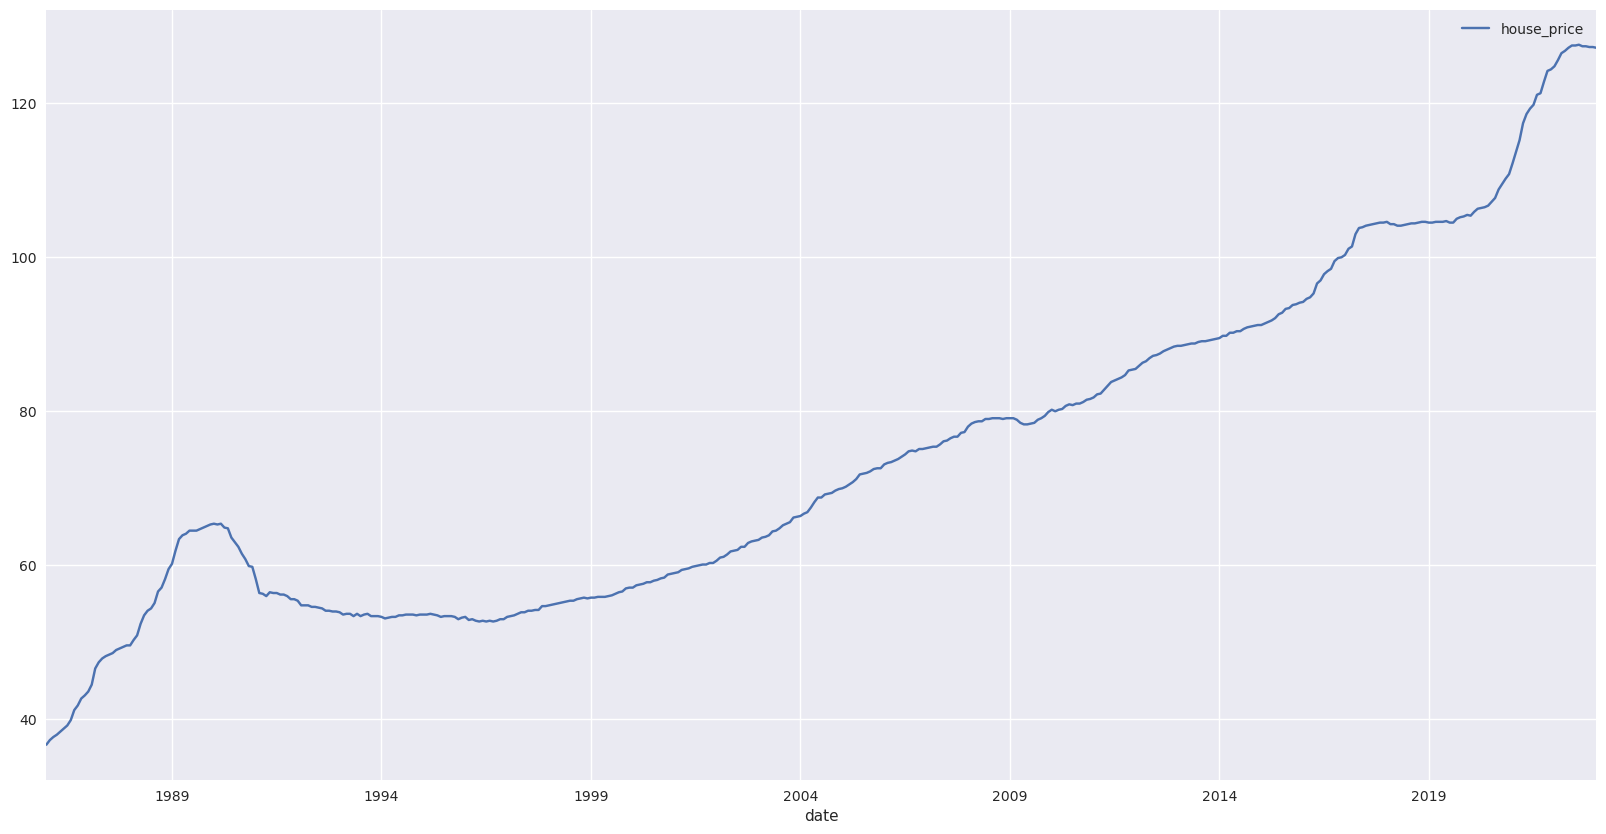

In [3]:
# New housing price index, monthly
# https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810020501&pickMembers%5B0%5D=1.17&cubeTimeFrame.startMonth=01&cubeTimeFrame.startYear=1981&cubeTimeFrame.endMonth=02&cubeTimeFrame.endYear=2023&referencePeriods=19810101%2C20230201
# Jan 1986 - Feb 2023

index_col = "New housing price indexes"
df = pd.read_csv('./data/Ontario housing price index 1986-2023 - cleaned.csv', index_col=index_col, parse_dates=[index_col])

df = df.rename(columns={"Total (house and land)": "house_price"})
df.index.names = ['date']
df.plot(figsize=(20,10))

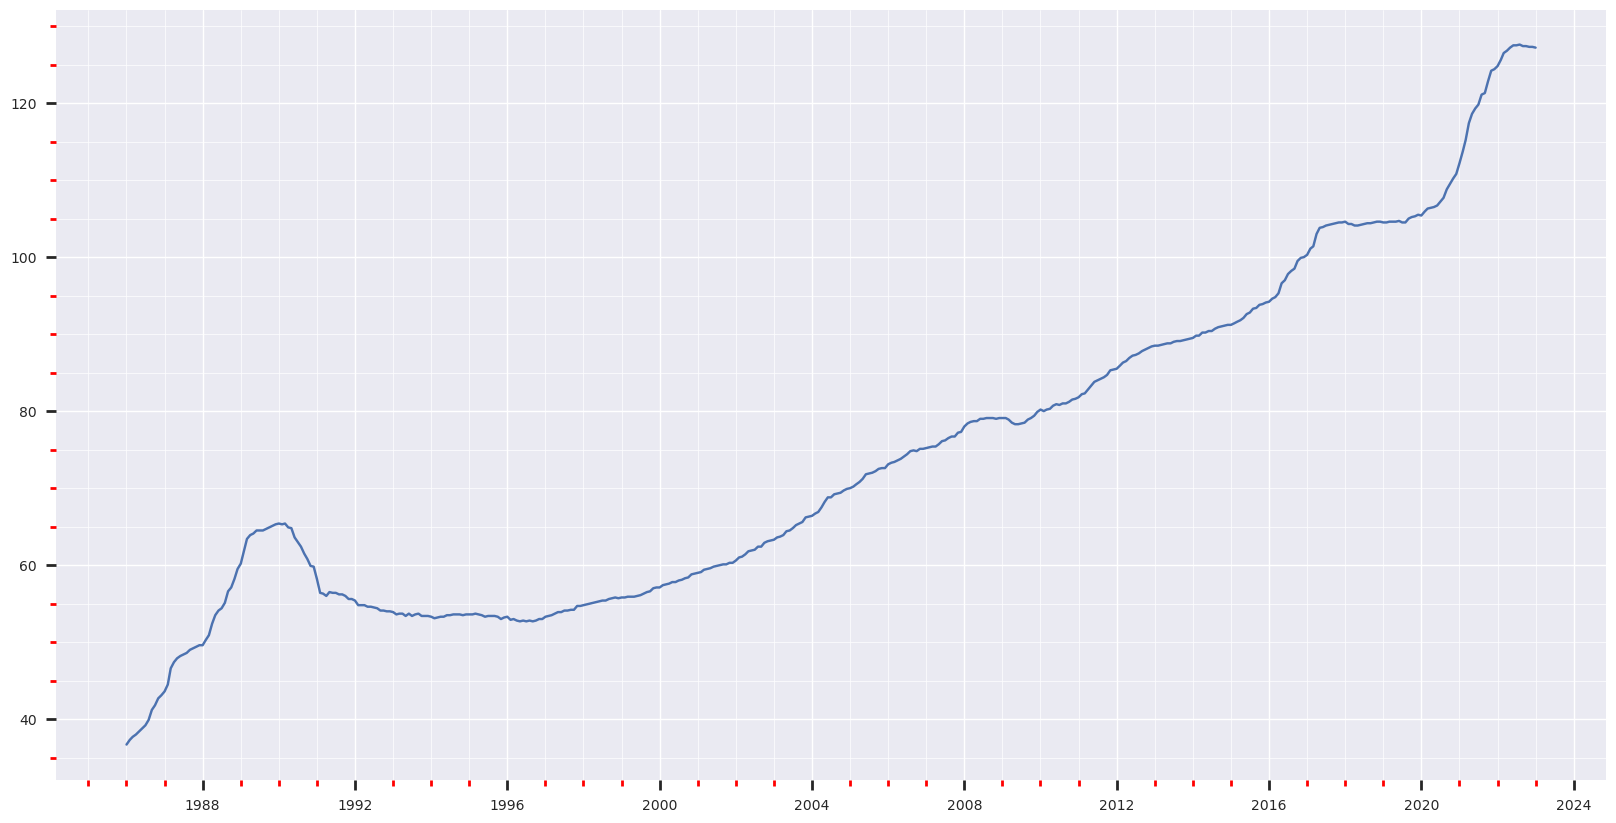

In [12]:

import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,10)
ax.plot(df)
# ax.get_xaxis().set_minor_locator(MultipleLocator(1))
# ax.get_yaxis().set_minor_locator(MultipleLocator(5))
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(which='major', color='w', linewidth=1.0)
ax.grid(which='minor', color='w', linewidth=0.5)

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 445 entries, 1986-01-01 to 2023-01-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   house_price  445 non-null    float64
dtypes: float64(1)
memory usage: 7.0 KB


In [14]:
df.describe()

,house_price
count,445.000000
mean,74.108090
std,21.695382
min,36.700000
25%,55.400000
50%,68.800000
75%,89.200000
max,127.600000


In [15]:
df

,house_price
date,
1986-01-01,36.7
1986-02-01,37.3
1986-03-01,37.7
1986-04-01,38.0
1986-05-01,38.4
...,...
2022-09-01,127.4
2022-10-01,127.4
2022-11-01,127.3


In [20]:
rates_df = pd.read_csv('./data/Prime-Rate-History-wowa.csv', index_col="Date", parse_dates=["Date"])
rates_df

,Prime Rate,Bank of Canada Overnight Rate
Date,,
1935-01-01,5.50,2.50
1936-01-01,5.21,2.50
1937-01-01,5.00,2.50
1938-01-01,5.00,2.50
1939-01-01,5.00,2.50
...,...,...
2022-11-01,5.95,3.75
2022-12-01,6.45,4.25
2023-01-01,6.70,4.50


In [21]:
df["rate"] = rates_df["Bank of Canada Overnight Rate"]
df["prime_rate"] = rates_df["Prime Rate"]
df

,house_price,rate,prime_rate
date,,,
1986-01-01,36.7,10.08,11.00
1986-02-01,37.3,11.59,13.00
1986-03-01,37.7,10.19,12.00
1986-04-01,38.0,9.02,11.25
1986-05-01,38.4,8.18,10.25
...,...,...,...
2022-09-01,127.4,3.25,5.45
2022-10-01,127.4,3.75,5.45
2022-11-01,127.3,3.75,5.95


<Axes: xlabel='date'>

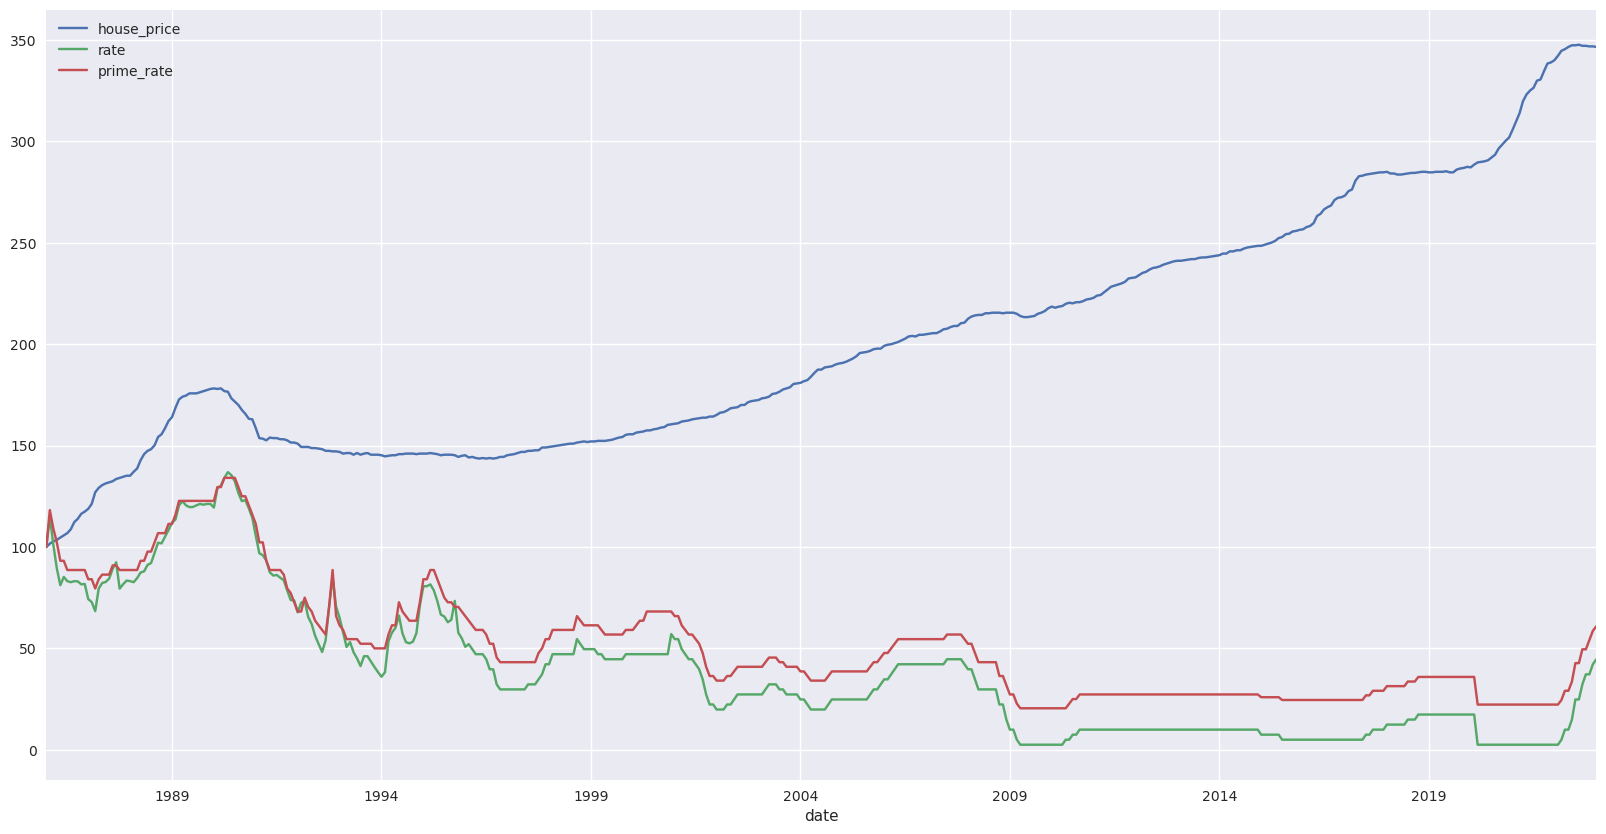

In [22]:
base_vals = df.iloc[0]
norm_df = df.div(base_vals).mul(100)
norm_df.plot(figsize=(20,10))

<Axes: xlabel='date'>

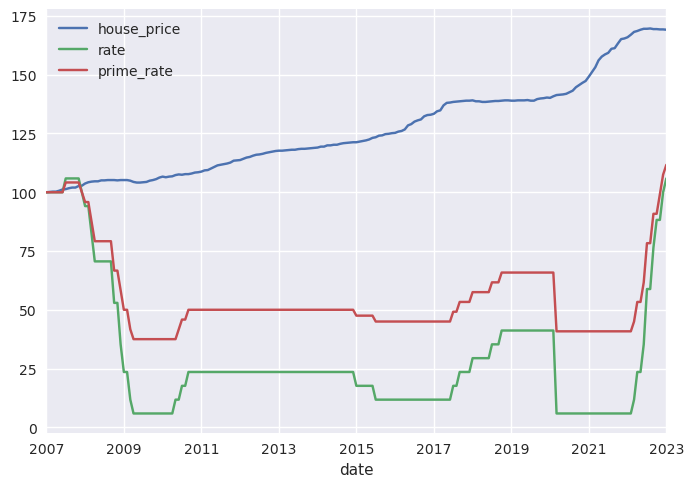

In [23]:
# difficult to see the changes in house price because of the wide range of y value
# due to house price only moving in one direction.
selected = df['2007-01-01':]
selected.div(selected.iloc[0]).mul(100).plot()

<Axes: xlabel='date'>

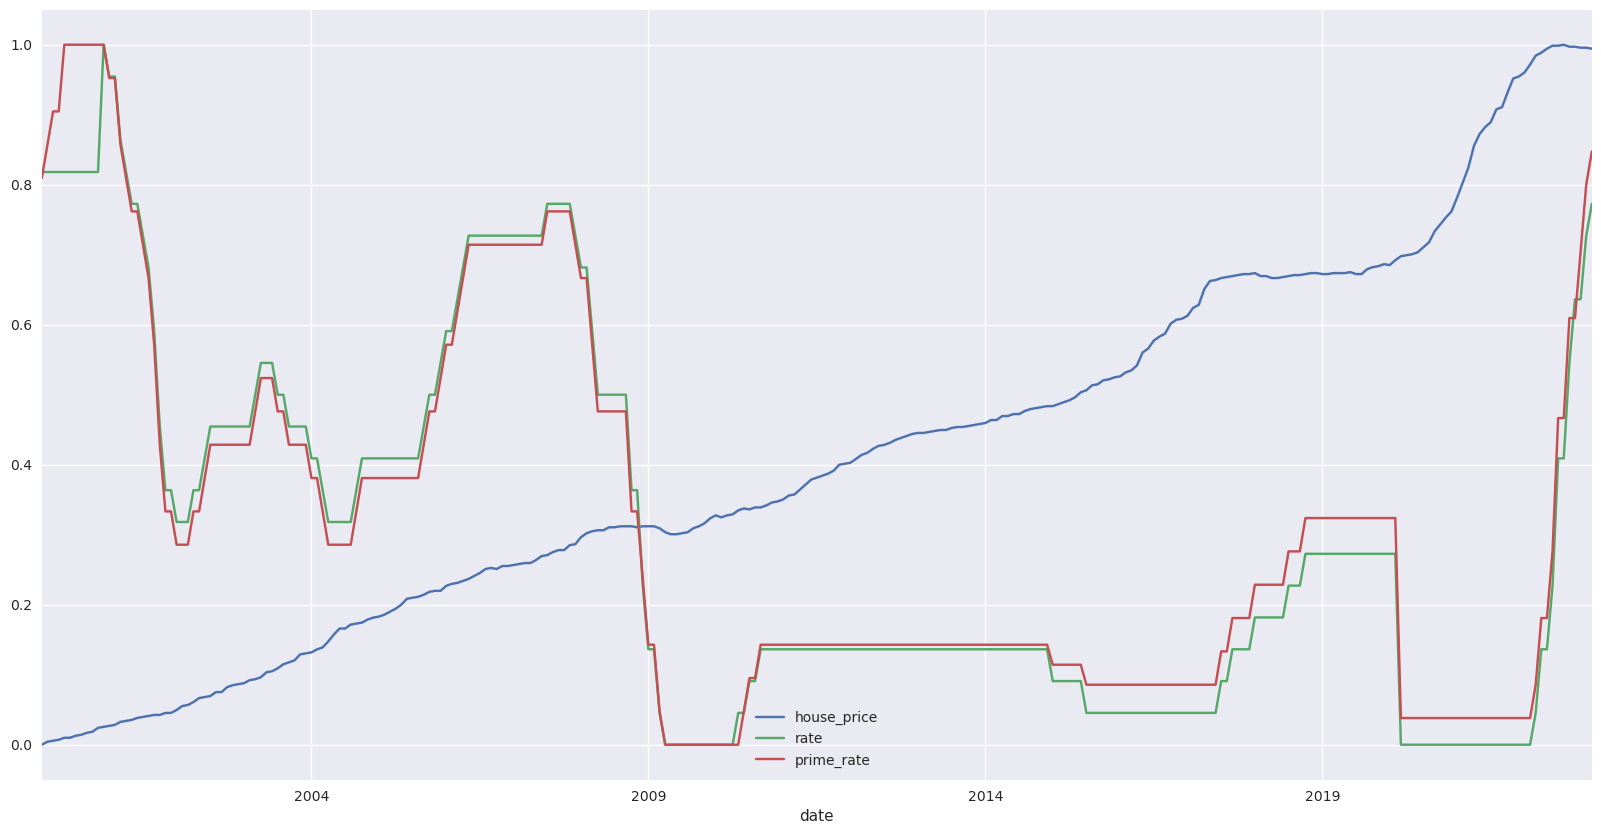

In [24]:
# Normalized with min and max value, but still not easy to see the changes in house price.
selection = df['2000-01-01':]
scaled_df = (selection - selection.min()) / (selection.max() - selection.min())
scaled_df.plot(figsize=(20,10))

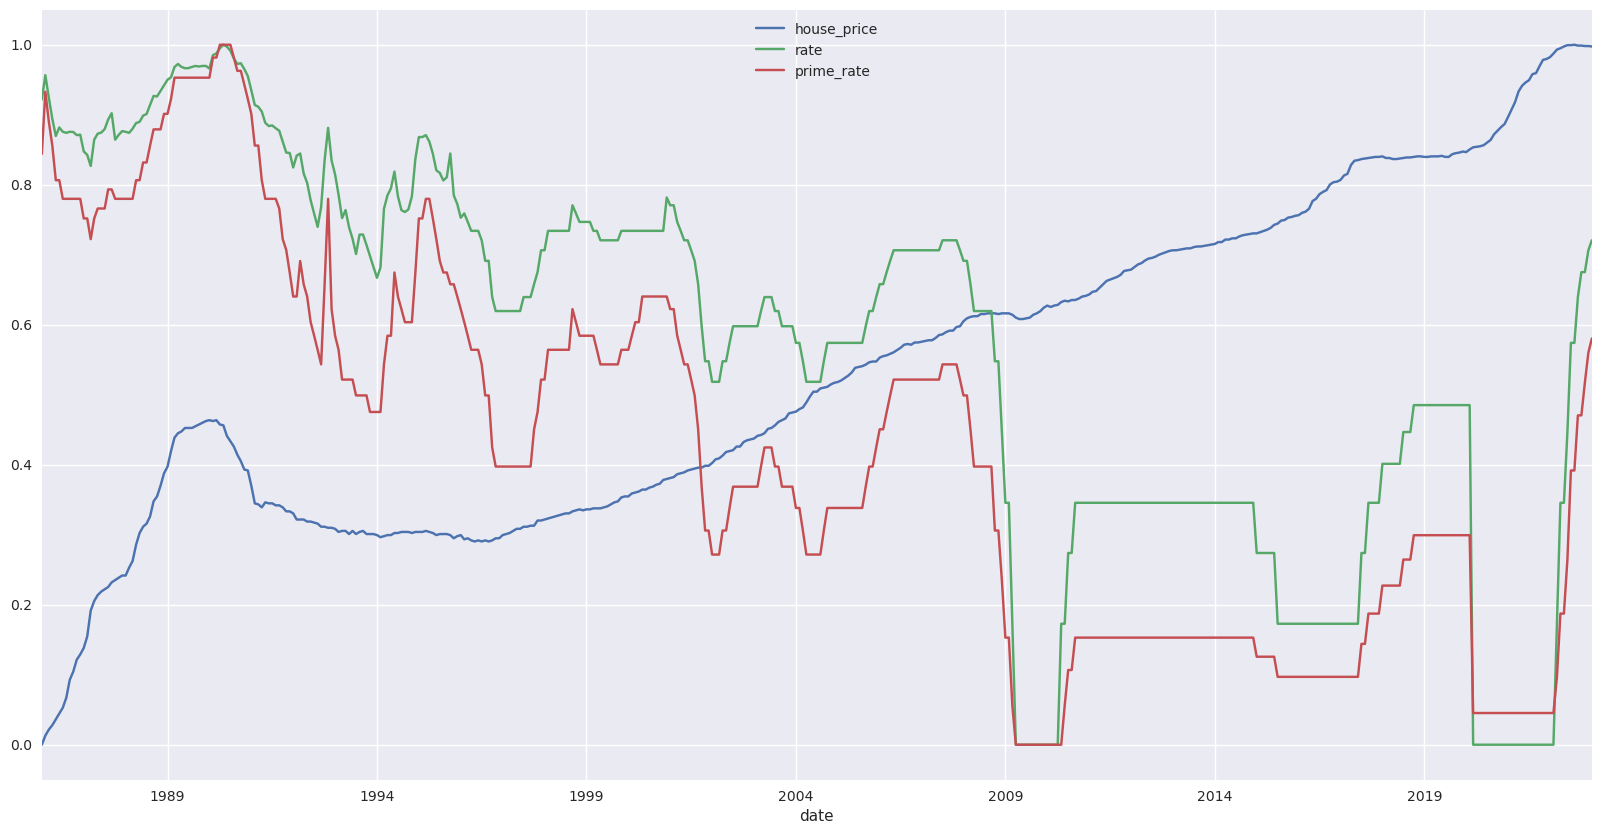

In [41]:
selection = df.copy()
# selection = selection.apply(lambda x: np.log10(x**2))
selection = selection.apply(lambda x: np.log10(x**2))
selection = (selection - selection.min()) / (selection.max() - selection.min())
fig = selection.plot(figsize=(20,10))
fig.legend(loc="upper center")


In [ ]:
# TODO: add inflation, unemployment rate & stock market index
